<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
    <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
<font color='green'><br>
<br />
Богдан, доброго дня! рад приветствовать тебя в финале) <br />
Вот и он подобрался, поздравляю. Остался последний рывок в этом марафоне)<br>
<br />
Меня зовут Николай. <br />И на этом этапе Вашего движения к новой профессии от меня будут комментарии по написанному коду. <br />Чтобы меньше "мусорить эфир" и чтобы максимально наглядно отделяться от основного кода, есть предложение условиться в некоторых обозначениях:<br /> <br />
<u><b>ТАКОЙ ШРИФТ</b></u> - всегда начало комментария <br />
<font color='green'>такой шрифт</font> - комментарии о том, что всё ОК <br/>
<font color='purple'>такой шрифт</font> - комментарии о том, что всё ОК по результату,<br> однако что есть ещё что-то или в коде или есть способы сделать более короткий или быстрый код <br/>
<font color='red'>такой шрифт</font> - комментарии о том, что есть критичный момент, влияющий на бизнес-результат проекта.<br/>
</font><br /><br />
<font color='green'>Как и всегда в спринтах - ставлю своей целью максимально помочь. Поэтому, все мои комментарии - это только способ передать свой опыт для помощи в твоих достижениях.

# Телеком. Прогнозирование оттока клиентов

Оператор связи «Ниединогоразрыва.ком» хочет научиться прогнозировать отток клиентов. Если выяснится, что пользователь планирует уйти, ему будут предложены промокоды и специальные условия. Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и договорах.

### Описание услуг

Оператор предоставляет два основных типа услуг: 

1. Стационарную телефонную связь. Возможно подключение телефонного аппарата к нескольким линиям одновременно.
2. Интернет. Подключение может быть двух типов: через телефонную линию (DSL*,* от англ. *digital subscriber line*, «цифровая абонентская линия») или оптоволоконный кабель (*Fiber optic*).  

Также доступны такие услуги:

- Интернет-безопасность: антивирус (*DeviceProtection*) и блокировка небезопасных сайтов (*OnlineSecurity*);
- Выделенная линия технической поддержки (*TechSupport*);
- Облачное хранилище файлов для резервного копирования данных (*OnlineBackup*);
- Стриминговое телевидение (*StreamingTV*) и каталог фильмов (*StreamingMovies*).

За услуги клиенты могут платить каждый месяц или заключить договор на 1–2 года. Доступны различные способы расчёта и возможность получения электронного чека

### Описание данных

Данные состоят из файлов, полученных из разных источников:

- `contract.csv` — информация о договоре;
- `personal.csv` — персональные данные клиента;
- `internet.csv` — информация об интернет-услугах;
- `phone.csv` — информация об услугах телефонии.

Во всех файлах столбец `customerID` содержит код клиента.

Информация о договорах актуальна на 1 февраля 2020.

In [1]:
# Импортируем необходимые библиотеки:
import pandas as pd
import numpy as np
#import pandas_profiling
from sklearn.preprocessing import OneHotEncoder, LabelBinarizer
from sklearn.preprocessing import StandardScaler
from functools import reduce
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import seaborn as sns
import plotly.graph_objects as go
import matplotlib as mt
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import catboost as cb
import lightgbm as lgb
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC
from sklearn.utils import shuffle
from sklearn.utils.class_weight import compute_class_weight
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.metrics import classification_report,auc
from sklearn.dummy import DummyClassifier

In [2]:
# Отключаем предупреждения "Анаконды":
import warnings 
warnings.filterwarnings('ignore')
%config InlineBackend.figure_format = 'svg'

# Увеличим дефолтный размер графиков:
from pylab import rcParams
rcParams['figure.figsize'] = 10,5

In [3]:
try:
    df_contract = pd.read_csv('contract.csv')
    df_internet = pd.read_csv('internet.csv')
    df_personal = pd.read_csv('personal.csv')
    df_phone = pd.read_csv('phone.csv')

except:
    df_contract = pd.read_csv('/datasets/final_provider/contract.csv')
    df_internet = pd.read_csv('/datasets/final_provider/internet.csv')
    df_personal = pd.read_csv('/datasets/final_provider/personal.csv')
    df_phone = pd.read_csv('/datasets/final_provider/phone.csv')

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
    <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
<font color='green'><br>ОК, данные на последней своей базе)

In [4]:
# Ознакомимся с датасетами:
datas = [df_contract, df_internet, df_personal, df_phone]
for data in datas:
    display(data.head())

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


In [5]:
for data in datas:
    display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


None

In [6]:
# Узнаем долю ушедших клиентов:
print('Доля ушедших клиентов: {:.1%}'.format(len(df_contract[df_contract['EndDate'] != 'No']) / len(df_contract)))

Доля ушедших клиентов: 26.5%


<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
    <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
<font color='green'><br>Знание этой библиотеки - отличный скил. Я не буду её запускать - много ресурсов занимает. Но мне понтно, что сейчас выведет)

In [7]:
#pandas_profiling.ProfileReport(df_contract)

In [8]:
#pandas_profiling.ProfileReport(df_internet)

In [9]:
df_contract['TotalCharges'].describe()

count     7043
unique    6531
top           
freq        11
Name: TotalCharges, dtype: object

**Вывод:** Нам представлены четыре таблицы с данными клиентов телефонной компании. 
1. Таблица `df_contract` содержит 7043 записи на 8 столбцах. Пропущенных значений не содержит, но есть строки с пробелом " " в столбце TotalCharges. Кроме этого в столбце `TotalCharges`необходимо выполнить преобразование числовых признаков из объектных. 
Исходя из данных после применения pandas_profiling, массовый откол клиентов наблюдался за все время четыре раза:  
-01.11.2019 - 485 клиентов  
-01.12.2019 - 466 клиентов  
-01.01.2020 - 460 клиентов  
-01.10.2019 - 458 клинетов  

Доля ушедших клиентов составляет 26.5%. 

2. Таблица `df_internet` содержит 5517 наблюдений на 8 столбцах. Пропущенных значений не содержит. Содержит информацию об использовании клиентами интернета.

3. Таблица `df_personal` содержит 7043 наблюдения на 5 столбцах. Пропущенных значений не имеет. Содержит персональную информацию о клентах, такую как: пол, наличие статуса пенсионера, брак и наличие иждивенцев.

4. Таблица `df_phone` 6361 наблюдение на 2 столбцах. Пропущенных значений не имеет. Содержит информацию об использовании многоканальной сети. 

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
    <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
<font color='green'><br>Данные изучены - ОК!!!!

## Преобразование данных

Для начала устраним пробелы в столбце TotalCharges. Для этого взгляним еще раз на таблицу.

In [10]:
df_contract[df_contract['TotalCharges']==' ']

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
488,4472-LVYGI,2020-02-01,No,Two year,Yes,Bank transfer (automatic),52.55,
753,3115-CZMZD,2020-02-01,No,Two year,No,Mailed check,20.25,
936,5709-LVOEQ,2020-02-01,No,Two year,No,Mailed check,80.85,
1082,4367-NUYAO,2020-02-01,No,Two year,No,Mailed check,25.75,
1340,1371-DWPAZ,2020-02-01,No,Two year,No,Credit card (automatic),56.05,
3331,7644-OMVMY,2020-02-01,No,Two year,No,Mailed check,19.85,
3826,3213-VVOLG,2020-02-01,No,Two year,No,Mailed check,25.35,
4380,2520-SGTTA,2020-02-01,No,Two year,No,Mailed check,20.00,
5218,2923-ARZLG,2020-02-01,No,One year,Yes,Mailed check,19.70,
6670,4075-WKNIU,2020-02-01,No,Two year,No,Mailed check,73.35,


Как мы можем видеть, начало использования услугами выпадает на последний день табличного периода. Поэтому можем их заменить на значение месячной оплаты - MonthlyCharges

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
    <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
<font color='green'><br>точно, новички)

In [11]:
df_contract['TotalCharges'] = df_contract.apply(lambda x: x['MonthlyCharges'] if x['TotalCharges']==" " else x['TotalCharges'],axis=1) 

Теперь выполним преобразование числовых признаков из объектных (TotalCharges).

In [12]:
df_contract['TotalCharges'] = pd.to_numeric(df_contract['TotalCharges'],errors='coerce')

Проверим, образовались ли пропуске после применения метода to_numeric()

In [13]:
df_contract.isna().sum()

customerID          0
BeginDate           0
EndDate             0
Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

Выполним преобразование полей BeginDate и BeginDate в datetime. Рассчитаем время в днях (пользователь пользовался услугами компании).

In [14]:
df_contract['BeginDate'] = pd.to_datetime(df_contract['BeginDate'],errors='coerce')

Если EndDate = No, то пользователь является на текущую дату 2020-02-01 клиентом компании, поэтому заполним значения, где EndDate = No текущей датой = 2020-02-01.

In [15]:
df_contract['EndDate2'] = df_contract.apply(lambda x: "2020-02-01" if x['EndDate']=="No" else x['EndDate'],axis=1)

In [16]:
df_contract['EndDate2'] = pd.to_datetime(df_contract['EndDate2'],errors='coerce')

In [17]:
df_contract['Time'] = (df_contract['EndDate2']-df_contract['BeginDate']).dt.days.astype(float)

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
    <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
<font color='green'><br>этот новфй фактор - верная идея, ОК.

In [18]:
df_contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   object        
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7043 non-null   float64       
 8   EndDate2          7043 non-null   datetime64[ns]
 9   Time              7043 non-null   float64       
dtypes: datetime64[ns](2), float64(3), object(5)
memory usage: 550.4+ KB


### Соединение таблиц

In [19]:
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['customerID'],
                                            how='outer'), datas)

In [20]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   object        
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7043 non-null   float64       
 8   EndDate2          7043 non-null   datetime64[ns]
 9   Time              7043 non-null   float64       
 10  InternetService   5517 non-null   object        
 11  OnlineSecurity    5517 non-null   object        
 12  OnlineBackup      5517 non-null   object        
 13  DeviceProtection  5517 non-null   object        
 14  TechSupport       5517 n

In [21]:
df_merged.isna().sum()

customerID             0
BeginDate              0
EndDate                0
Type                   0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
EndDate2               0
Time                   0
InternetService     1526
OnlineSecurity      1526
OnlineBackup        1526
DeviceProtection    1526
TechSupport         1526
StreamingTV         1526
StreamingMovies     1526
gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
MultipleLines        682
dtype: int64

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
    <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
<font color='green'><br>ОК, принято)

###  Выделение целевого признака

В данных отсутствует целевой признак. Однако, можно сделать предположение, что целевым признаком является поле "EndDate", содержащее информацию о расторжении договора. Если дата расторжения договора = No, значит пользователь является клиентом, если дата расторжения договора!=No, то значит пользователь больше не является клиентом «Ниединогоразрыва.ком»

In [22]:
df_merged['Churn'] = df_merged.apply(lambda x: 0 if x['EndDate']=="No" else 1,axis=1)

In [23]:
df_merged.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,EndDate2,Time,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents,MultipleLines,Churn
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,2020-02-01,31.0,...,No,No,No,No,Female,0,Yes,No,NaN,0
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.50,2020-02-01,1036.0,...,Yes,No,No,No,Male,0,No,No,No,0
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,2019-12-01,61.0,...,No,No,No,No,Male,0,No,No,No,1
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,2020-02-01,1371.0,...,Yes,Yes,No,No,Male,0,No,No,NaN,0
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,2019-11-01,61.0,...,No,No,No,No,Female,0,No,No,No,1


<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
    <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
<font color='green'><br>тааааак, целевая на месте, ОК.

Некоторые признаки необходимо удалить, так как они не нужны для обучения и не влияют на результат прогнозирования. Удалим customerID, EndDate, BeginDate, EndDate2.

In [24]:
df_deleted = df_merged.drop(['customerID','EndDate','BeginDate','EndDate2'],axis=1)

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
</font>
<font color='green'><br>
ОТЛИЧНО, что удаляешь факторы-даты!!!!! Если у нас тема НЕ временные ряды, то такие факторы лучше не использовать. Они "нагонят" метрики, но бизнес-эффективность модели  - рухнет.

In [25]:
df_deleted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Type              7043 non-null   object 
 1   PaperlessBilling  7043 non-null   object 
 2   PaymentMethod     7043 non-null   object 
 3   MonthlyCharges    7043 non-null   float64
 4   TotalCharges      7043 non-null   float64
 5   Time              7043 non-null   float64
 6   InternetService   5517 non-null   object 
 7   OnlineSecurity    5517 non-null   object 
 8   OnlineBackup      5517 non-null   object 
 9   DeviceProtection  5517 non-null   object 
 10  TechSupport       5517 non-null   object 
 11  StreamingTV       5517 non-null   object 
 12  StreamingMovies   5517 non-null   object 
 13  gender            7043 non-null   object 
 14  SeniorCitizen     7043 non-null   int64  
 15  Partner           7043 non-null   object 
 16  Dependents        7043 non-null   object 


### Разделение данных на выборки

In [26]:
# Создадим функцию, которая выделит целевой признак
def split_data(data, target_column):
    return data.drop(columns=[target_column], axis=1), data[target_column]

In [27]:
features, target = split_data(df_deleted,'Churn')

In [28]:
features_train, features_test, target_train, target_test = train_test_split(features, 
                                                                           target, 
                                                                           test_size=0.2, 
                                                                           random_state=12345,
                                                                           stratify = target)

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
</font>
<font color='green'><br>
ясно

## Предварительная обработка данных (Pipeline)
- заполнение пропущенных значений - SimpleImputer; 
- категориальные данные в числовые данные - OneHotEncoder; 
- маштабирование числовых данных - StandardScaler;
- объединение данных - ColumnTransformer

In [29]:
num_features = features_train.select_dtypes(include=['float64']).columns
cat_features = features_train.select_dtypes(include=['object']).columns

In [30]:
num_transformer = Pipeline([('imputer',SimpleImputer(strategy='mean')),
                            ('scaler',StandardScaler())])

In [31]:
cat_transformer = Pipeline([('imputer',SimpleImputer(strategy='constant',fill_value='missing')),
                             ('ohe',OneHotEncoder(sparse=False,handle_unknown='ignore'))
                           ])

In [32]:
prepocessor = ColumnTransformer([
    ('num',num_transformer,num_features),
    ('cat',cat_transformer,cat_features)])

## Моделирование

### compute_class_weight

Имеем несбалансированные данные, поэтому воспользуемся compute_class_weight

In [33]:
classes = np.unique(target_train)
weights = compute_class_weight(class_weight='balanced', classes=classes, y=target_train)
class_weights = dict(zip(classes, weights))

In [34]:
class_weights

{0: 0.6805991785455424, 1: 1.8842809364548494}

### Different Pipelines

In [35]:
pipe_lr = Pipeline([('prepr',prepocessor),
                    ('clf', LogisticRegression(solver='liblinear',
                                               class_weight = class_weights, 
                                               random_state = 12345,
                                               n_jobs=-1))])

pipe_lgb = Pipeline([('prepr',prepocessor),
                    ('clf', lgb.LGBMClassifier(class_weight = class_weights, 
                                               random_state=1234))])

pipe_rfc = Pipeline([('prepr',prepocessor),
                    ('clf', RandomForestClassifier(class_weight = class_weights, 
                                                   random_state=1234))])

pipe_catboost = Pipeline([('prepr',prepocessor),
                    ('clf', cb.CatBoostClassifier(class_weights = class_weights, 
                                                  random_state=12345, 
                                                  verbose=False))])

In [36]:
param_grid_lr = [
    {
        'clf__max_iter':[100,200]
    }]

param_grid_lgb = [
    {
        'clf__learning_rate':np.arange(0.01, 0.5, 0.05),
        'clf__n_estimators':[100,200,500],
        'clf__num_leaves':[31,41,51]
    }]

param_grid_rfc = [
    {
        'clf__n_estimators':range(1,100,20),
        'clf__max_depth':range(2,100,20)
    }]

param_grid_catboost = [
    {
        'clf__iterations':[150,300],
        'clf__learning_rate': np.arange(0.01, 0.5, 0.01),
        'clf__depth': [2,4],
        'clf__l2_leaf_reg': [1, 3, 7]
    }]

In [37]:
LR = GridSearchCV(estimator = pipe_lr,
                  param_grid = param_grid_lr,
                  scoring = 'roc_auc',
                  cv = 3,
                  n_jobs = -1) 

LGB = GridSearchCV(estimator = pipe_lgb,
                  param_grid = param_grid_lgb,
                  scoring = 'roc_auc',
                  cv = 3,
                  n_jobs = -1) 

RFC = GridSearchCV(estimator = pipe_rfc,
                  param_grid = param_grid_rfc,
                  scoring = 'roc_auc',
                  cv = 3,
                  n_jobs = -1) 

CatBoost = GridSearchCV(estimator = pipe_catboost,
                  param_grid = param_grid_catboost,
                  scoring = 'roc_auc',      
                  cv = 3,
                  n_jobs = -1) 

In [38]:
models = [LR,LGB,RFC,CatBoost]

In [39]:
models_dict = {0: 'Logistic Regression', 
               1: 'LGBM Classifier',     
               2: 'Random Forest Classifier',
               3: 'CatBoost Classifier'}

In [40]:
print('Поиск лучшей модели:')
best_roc_auc = 0.0
best_clf = 0
best_model = ''
spr = {}

for i, model in enumerate(models):
    print('\nМодель: {}'.format(models_dict[i]))
    model.fit(features_train, target_train)
    print('\nПараметры модели: {}'.format(model.best_params_))
    print('roc_auc модели на train-выборке: {:.2f}'.format(model.best_score_))
    print('accuracy модели на train-выборке: {:.2f}'.format(accuracy_score(target_train, model.predict(features_train))))
    
    
    predict = model.predict(features_test)

    print('roc_auc модели на test-выборке: {:.2f}'.format(roc_auc_score(target_test, predict)))    
    print('roc_auc модели на test-выборке 0 класс: {:.2f}'.format(roc_auc_score(target_test, model.predict_proba(features_test)[:,0])))
    print('roc_auc модели на test-выборке 1 класс: {:.2f}'.format(roc_auc_score(target_test, model.predict_proba(features_test)[:,1])))   
    print('accuracy модели на test-выборке: {:.2f}'.format(accuracy_score(target_test, model.predict(features_test))))
          
    spr[models_dict[i]] = [round(model.best_score_,2), 
                           round(roc_auc_score(target_test, predict),2),
                           round(roc_auc_score(target_test, model.predict_proba(features_test)[:,0]),2),
                           round(roc_auc_score(target_test, model.predict_proba(features_test)[:,1]),2),
                           round(accuracy_score(target_train, model.predict(features_train)),2),
                           round(accuracy_score(target_test, model.predict(features_test)),2)]
    
    if roc_auc_score(target_test, predict) > best_roc_auc:
        best_roc_auc = roc_auc_score(target_test, predict)
        best_accuracy = accuracy_score(target_test, predict)
        best_model = model
        best_clf = i

Поиск лучшей модели:

Модель: Logistic Regression

Параметры модели: {'clf__max_iter': 100}
roc_auc модели на train-выборке: 0.85
accuracy модели на train-выборке: 0.75
roc_auc модели на test-выборке: 0.76
roc_auc модели на test-выборке 0 класс: 0.16
roc_auc модели на test-выборке 1 класс: 0.84
accuracy модели на test-выборке: 0.74

Модель: LGBM Classifier

Параметры модели: {'clf__learning_rate': 0.11, 'clf__n_estimators': 200, 'clf__num_leaves': 31}
roc_auc модели на train-выборке: 0.89
accuracy модели на train-выборке: 0.96
roc_auc модели на test-выборке: 0.81
roc_auc модели на test-выборке 0 класс: 0.11
roc_auc модели на test-выборке 1 класс: 0.89
accuracy модели на test-выборке: 0.83

Модель: Random Forest Classifier

Параметры модели: {'clf__max_depth': 2, 'clf__n_estimators': 81}
roc_auc модели на train-выборке: 0.84
accuracy модели на train-выборке: 0.72
roc_auc модели на test-выборке: 0.75
roc_auc модели на test-выборке 0 класс: 0.16
roc_auc модели на test-выборке 1 класс: 0.8

In [41]:
data_spr = pd.DataFrame(data=spr,index=['roc_auc на train', 
                                        'roc_auc на test',
                                        'roc_auc на test для 0 класса',
                                        'roc_auc на test для 1 класса',
                                        'accuracy на train', 
                                        'accuracy на test'])
data_spr

,Logistic Regression,LGBM Classifier,Random Forest Classifier,CatBoost Classifier
roc_auc на train,0.85,0.89,0.84,0.92
roc_auc на test,0.76,0.81,0.75,0.86
roc_auc на test для 0 класса,0.16,0.11,0.16,0.07
roc_auc на test для 1 класса,0.84,0.89,0.84,0.93
accuracy на train,0.75,0.96,0.72,0.90
accuracy на test,0.74,0.83,0.72,0.86


In [42]:
print('Лучший результат показала модель: {} с параметрами {}'.format(models_dict[best_clf],best_model.best_params_))
print('\nroc_auc лучшей модели на test-выборке: {}'.format(round(best_roc_auc,2)))
print('\naccuracy лучшей модели на test-выборке: {}'.format(round(best_accuracy,2)))

Лучший результат показала модель: CatBoost Classifier с параметрами {'clf__depth': 2, 'clf__iterations': 300, 'clf__l2_leaf_reg': 1, 'clf__learning_rate': 0.48000000000000004}

roc_auc лучшей модели на test-выборке: 0.86

accuracy лучшей модели на test-выборке: 0.86


In [43]:
predict_test_best_model = best_model.predict(features_test)

In [44]:
target_probabilities = best_model.predict_proba(features_test)[:,1]
false_positive_rate, true_positive_rate, threshold = roc_curve(target_test, target_probabilities)

In [45]:
print("roc_auc на test для 1 класса: ",round(roc_auc_score(target_test, target_probabilities),2))
print("roc_auc на test: ",round(roc_auc_score(target_test, predict_test_best_model),2))
print("auc на test: ",round(auc(false_positive_rate, true_positive_rate),2))

roc_auc на test для 1 класса:  0.93
roc_auc на test:  0.86
auc на test:  0.93


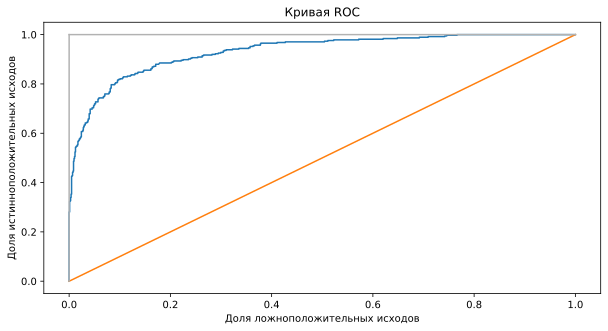

In [46]:
# график кривой ROC 
plt.title("Кривая ROC")
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], Ls='-')
plt.plot([0, 0], [1, 0] , c=".7")
plt.plot([1, 1] , c=".7")
plt.ylabel("Доля истинноположительных исходов") 
plt.xlabel("Доля ложноположительных исходов") 
plt.show();

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
</font>
<font color='green'><br>
Чёткая модельная работа!!! Молодец.

## Тестирование

In [47]:
dummy_c = DummyClassifier(strategy = 'stratified',random_state=12345)
dummy_c.fit(features_train, target_train)

print("roc_auc константной модели {:.2f}".format(roc_auc_score(target_test, dummy_c.predict(features_test))))

if best_roc_auc > roc_auc_score(target_test,dummy_c.predict(features_test)):
    print('модель выиграла')

roc_auc константной модели 0.49
модель выиграла


## Вывод

По нашим результатам в 86% случаев наша лучшая модель предсказала правильный результат на тестовых данных (accuracy = 0.86). Roc-auc составил 0.86

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
</font>
<font color='green'><br>
ОК, Богдан, скажу, что уверенная работа, на мой взгляд)<br>
Обработка данных, размышления над факторами, многогранная модельная работа, конечные результаты - многое удалось как надо<br> 
А что совсем хорошо, так это то, что не стал гнаться за точностью любой ценой, даже ценой наружения бизнес-логики. (это я про даты-признаки, многие их вставляют...)<br>

Прежде, чем идти дальше, напомню из прошлых наших общений основные моменты, которые бы мне хотелось зафиксировать, как важные для момделирования (что-то ты и так хорошо используешь):<br>   
1) F1, Акураси и AUC - отличные метрики, но нужно держать в голове, что это лишь бобщённые характеристики. А в реальной практике бизнесу часто важно знать детали самой ошибки - из каких ошибок/успехов она складывается. И в этом случае очень кстати будут меры полноты и точности. Рассмотри возможность их использования для своих проектов. Только через них можно выйти на финансовые возможности модели. Ведь перед запуском её в бой, будет сравнение стоимости создания и поддержки модели со стомостью "оставить как есть" 
    
2) При анализе факторов влияния (их зависиомть между собой и на целевую) происходит по одному из трёх алгоритмов, исходя из типа шкалы. Могут применять следующие графический и аналитический анализы:<br>
- колличественная-колличественная: аналитически методод - корреляции, графический - скатерплот.<br>
- колличественная-номинальная: аналитически методод - проверка гипотез (стьюдент, маннауитни), графический - боксплот.<br>
- номинальная-номинальная: аналитически методод - Хи-квадрат, графический - круговая диаграмма<br>
Это я к тому разделу, который посвящён анализу данных. Там ты сделал интересные предположения и чтобы их доказать, стои проверить аналитически. Вот как раз те методы проверки гипотез, что выше написал.<br>
    
3) Алгоритм нахождения модели может быть таким:<br>
- изучаем проблематику бизнеса и самой темы (в данном случае отток). Пытаемся понять суть явления.<br>
- генерируем разные факторы влияния - любые.<br>
- дизайнируем (прикидываем модели) какие методы решения есть, чтобы решить проблему.<br>
- Смотрим, какие данные и в какой шкале есть. Что нужно ещё, что применить выбранный метод.<br>
- Оцениваем мультиколлинеарность.<br>
- строим модели и анализируем те фактры, какие сгенерировали ранее.<br>
- Думаем над тем, какие причины (факторы) могут ещё влиять на отток.<br>
- если после нескольких итераций точность "замирает" - значит достигли потолка)<br>
 
4) Проведение анализа важности факторов с помощью команды feature_importances_ (+графический анализ). Отличная вещь намечается: высока я метрика + график рейтинаг факторов по силе влияния на целевой признак). Важнейшая часть любого модельного финала. Если видно, что часть факторов - слабозначимые для модели. Т.е. не значительно влияют на целевую переменную, то их смело можно убирать из модели. Ну и для бизнеса доносить: так мол и так - на эти факторы надо обращать внимание, а эти не влияют на уход клиента.

<font color='red'>
Есть пару-тройку вопросов для дополнений:<br>
1)При моделировании существует проблематика мультиколлинеарности.(когда количественные факторы имеют сильную корреляцию друг с другом - больше 0.8).Есть ли она у нас?  Если есть - надо  решать по понятиям:) (удалить лишнее)<br><br>
2) Будет здорово, если построишь график важности факторов.
<font color='green'>
Однозначно видно, что ты технически сделал хорошую работу.<br>
Просто эти два пункта - важный момент в алгоритме моделирования. И хотелось, чтобы они у тебя остались в финале.<br>
    
До конца модель не прогналась - кернел сегодня на удивление "быстр"(((( Но код видел и результаты видел..<br>

Спасибо)<br>
БУДУ ЖДАТЬ КОММЕНТАРИЕВ.

### Проверка на мультиколлениарность

Чтобы проверить признаки на мультиколлениарность, создадим матрицу корреляции, после чего отметим признаки с высокой корреляцией

Text(0.5, 1.0, 'Матрица корреляций')

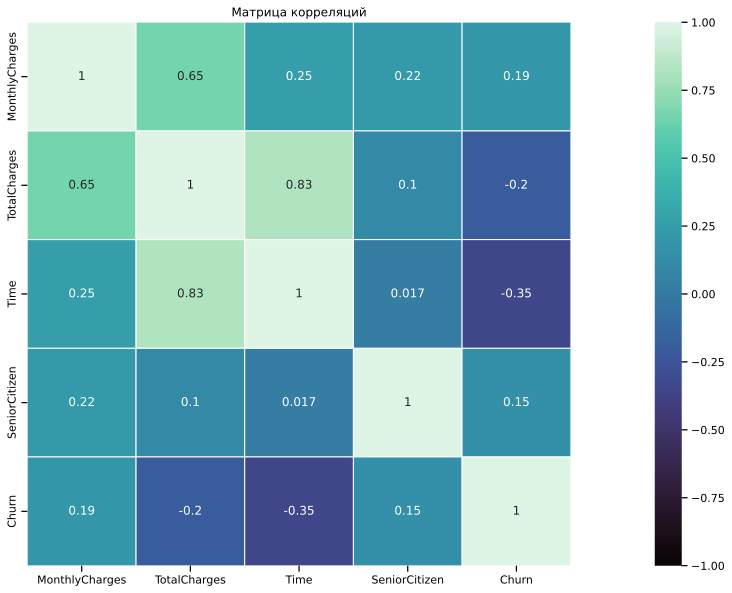

In [48]:
plt.figure(figsize=(30,10))
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2.5, 'font.family':'Helvetica'})
sns.heatmap(
    df_deleted.corr(),
    vmin=-1, vmax=1, 
    center= 0, 
    cmap= 'mako',
    linewidth=1, linecolor='w', square=True, annot=True)
plt.title('Матрица корреляций')

Исходя из полученных сведений, у нас имеется два столбца с высокой корреляцией - `Time` и `TotalCharges`. В целом, это вполне логичная корреляция, поскольку чем дольше клиент пользуется услугами связи, тем больше сумма потраченных средств. Поэтому в данном случае не наблюдается сильная мультиколленеарность, которая способная повлиять на результат предсказывания. 

### Влияние признаков

Для определения влияния признаков, возьмем лучшую модель

In [49]:
model = cb.CatBoostClassifier(class_weights = class_weights, 
                              depth=2, 
                              iterations=300, 
                              l2_leaf_reg=1,
                              learning_rate=0.43,
                              random_state=12345, 
                              verbose=False)

In [50]:
pipeline = Pipeline([('prepr',prepocessor),
                    ('clf', model)])

In [51]:
pipeline.fit(features_train,target_train)

Pipeline(steps=[('prepr',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['MonthlyCharges', 'TotalCharges', 'Time'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('ohe',
                                                       

In [52]:
pd.DataFrame(pipeline['prepr'].fit_transform(features_train)).head()

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,0.165477,-0.778862,-1.033811,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.823991,-0.729986,-1.035145,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.657700,0.786064,0.670234,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
3,0.757475,0.969029,0.751633,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,1.362776,2.173177,1.524258,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0


In [53]:
features_names = list(num_features)+list(pipeline.named_steps['prepr'].transformers_[1][1]\
   .named_steps['ohe'].get_feature_names(cat_features))

In [54]:
print(features_names)

['MonthlyCharges', 'TotalCharges', 'Time', 'Type_Month-to-month', 'Type_One year', 'Type_Two year', 'PaperlessBilling_No', 'PaperlessBilling_Yes', 'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check', 'InternetService_DSL', 'InternetService_Fiber optic', 'InternetService_missing', 'OnlineSecurity_No', 'OnlineSecurity_Yes', 'OnlineSecurity_missing', 'OnlineBackup_No', 'OnlineBackup_Yes', 'OnlineBackup_missing', 'DeviceProtection_No', 'DeviceProtection_Yes', 'DeviceProtection_missing', 'TechSupport_No', 'TechSupport_Yes', 'TechSupport_missing', 'StreamingTV_No', 'StreamingTV_Yes', 'StreamingTV_missing', 'StreamingMovies_No', 'StreamingMovies_Yes', 'StreamingMovies_missing', 'gender_Female', 'gender_Male', 'Partner_No', 'Partner_Yes', 'Dependents_No', 'Dependents_Yes', 'MultipleLines_No', 'MultipleLines_Yes', 'MultipleLines_missing']


<AxesSubplot:>

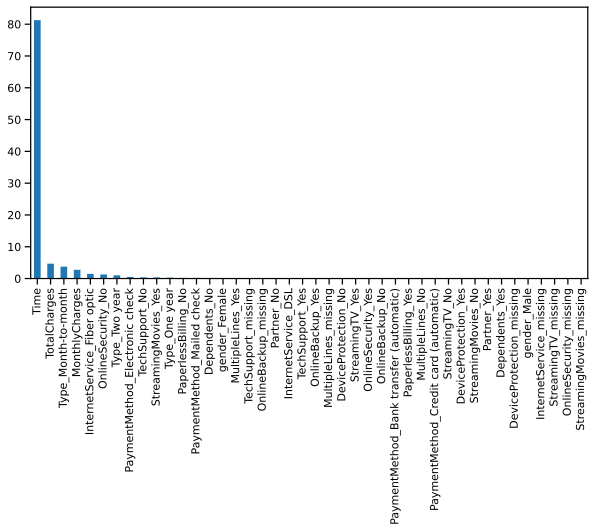

In [55]:
weights_features = pd.Series(pipeline['clf'].feature_importances_, 
                    index = features_names)
weights_features.sort_values(ascending = False).plot(kind='bar')

На модель влияют в большей степени (т.е увеличивают вероятность оттока клиента):  
-время пользования услугами компании (Time = EndDate - BeginDate)  
-общие затраты за все время  
-ежемесячные платежи  
-тип договора Month-to-month

Таким образом, для удержания клиентов необходимо обращать внимание именно на более долгих пользователей с типом договора Month-to-month. Поэтому именно данным клиентам нужно предлагать дополнительные возможности для сохранения их лояльности к компании. 

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА 2</u></b>
</font>
<font color='green'><br>
Привет, Богдан!<br>
ОК, Увидел твои доработки. Всё в точку.<br>Что ж, тогда всё на этом)<br>
Спасибо за этот труд и за совместную работу на других проектах)<br>
Искренне желаю покорить ещё не один аналитический Эверест)<br>

# Отчёт

От компании «Ниединогоразрыва.ком» поступила задача по созданию модели машинного обучения, способной предвидеть отток клиентов. В случае если пользователь планирует уйти, ему будут предложены дополнительные специальные условия.  Для выполнения поставленной задачи команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и договорах.  

В ходе выполнения задания были произведены все основные пункты плана, а именно: первичное ознакомление, исследовательский анализ, подготовка признаков, обучение модели и подбор гиперпараметров, а также проверка модели на адекватность.  

Основной трудностью при выполнении проекта являлась преобразование данных - некоторые данные нужно было привести к одному виду, другие к другому. Для решения этой проблемы был создан пайплайн, состоящий из четырех методов : для  пропущенных значений - SimpleImputer; для категориальных данных в числовые данные - OneHotEncoder; для маштабирование числовых данных - StandardScaler; для объединение данных - ColumnTransformer.  

Ключевыми этапами в работе являлись: 
1. Предобработка данных;
2. Выделение целового признака
3. Преобразование данных и создание пайплайна
4. Моделирование
5. Тестирование модели с проверкой на адекватность
6. Проверка на мультиколлениарность
7. Создание таблицы самых влияющих признаков.  

По итогу нам удалось создать четыре модели, наилучшей из которых является CatBoost Classifire, дающей AUC-ROC на тестовой выборке 86%.
